In [123]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
creditCard_df = pd.read_csv("creditCard.csv")

# Step 1 - Loading and examing the dataset

In [124]:
print(creditCard_df.head())

  CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]


In [125]:
print(creditCard_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Step 2 - Dealing with null values and outliers

In [126]:
creditCard_df = creditCard_df.dropna()

In [127]:
print(creditCard_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [128]:
creditCard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Step 3 - Perform preprocessing steps on the dataset - remove unused columns

In [129]:
# Drop the column "cust_id" from the dataframe creditCard_df
df = creditCard_df.drop("CUST_ID", axis=1)

In [130]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Step 4 - Perform preprocessing steps on the dataset - scaling

In [131]:
# get all columns names
df_columns = df.columns
print(list(df_columns))

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [132]:
# Use Standard Scaler
std = StandardScaler()
df_std = df
df_numpy = std.fit_transform(df_std)
creditCard_preprocessed  = pd.DataFrame(df_numpy, columns=df_columns)
creditCard_preprocessed 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


# Step 5 - Perform PCA

In [133]:
creditCard_preprocessed.shape

(8636, 17)

In [134]:
pca = PCA()
pca.fit(creditCard_preprocessed)

PCA()

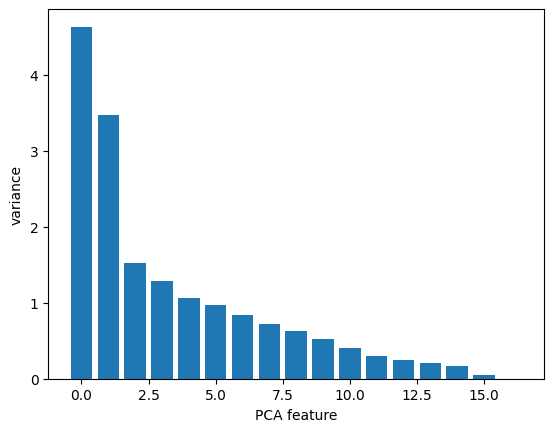

In [135]:
# Plot the explained variances to identify number of components/intrinsic dimension
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

Based on the chart above, I will use 2 as intrinsic dimension

In [136]:
n_components = 2

In [137]:
pca_2 = PCA(n_components=n_components)
# pca_2.set_output(transform='pandas')
pca_scaled_df = pca_2.fit_transform(creditCard_preprocessed)

In [138]:
pca_scaled_df

array([[-1.69639518, -1.12258359],
       [-1.21569403,  2.43564787],
       [ 0.9358566 , -0.38520314],
       ...,
       [-0.93002056, -1.84123959],
       [-2.35600957, -0.71873124],
       [-0.5968235 , -0.44601724]])

In [139]:
# Assuming pca_scaled_df is a DataFrame
pca_columns = pd.DataFrame(pca_2.components_.T, index=creditCard_preprocessed.columns, columns=['PC-1', 'PC-2'])
print(pca_columns)

                                      PC-1      PC-2
BALANCE                           0.091985  0.405979
BALANCE_FREQUENCY                 0.109812  0.127739
PURCHASES                         0.412151  0.049530
ONEOFF_PURCHASES                  0.346776  0.069930
INSTALLMENTS_PURCHASES            0.337056 -0.011481
CASH_ADVANCE                     -0.030588  0.437247
PURCHASES_FREQUENCY               0.323665 -0.186582
ONEOFF_PURCHASES_FREQUENCY        0.294761 -0.014746
PURCHASES_INSTALLMENTS_FREQUENCY  0.277226 -0.173577
CASH_ADVANCE_FREQUENCY           -0.099145  0.429997
CASH_ADVANCE_TRX                 -0.056960  0.416411
PURCHASES_TRX                     0.391066 -0.011946
CREDIT_LIMIT                      0.210052  0.243823
PAYMENTS                          0.263725  0.264182
MINIMUM_PAYMENTS                  0.059327  0.170416
PRC_FULL_PAYMENT                  0.130565 -0.195709
TENURE                            0.077919 -0.004566


# Step 6 - Detect the optimal number of clusters for k-Means clustering

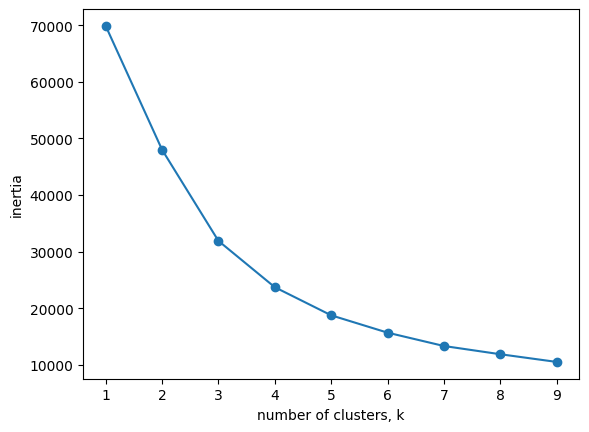

In [140]:
# Perform elbow method
ks = range(1,10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_scaled_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

From the diagram above, I will pick 4 as optimal number of clusters

# Step 7 - Run the k-Means clustering algorithm

In [141]:
n_clusters = 4

In [142]:
# Create a KMeans instance with 4 clusters: model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit model 
kmeans.fit(pca_scaled_df)

# Determine the cluster labels 
labels = kmeans.predict(pca_scaled_df)

print(labels)

[1 3 0 ... 1 1 1]


In [143]:
pca_scaled_df

array([[-1.69639518, -1.12258359],
       [-1.21569403,  2.43564787],
       [ 0.9358566 , -0.38520314],
       ...,
       [-0.93002056, -1.84123959],
       [-2.35600957, -0.71873124],
       [-0.5968235 , -0.44601724]])

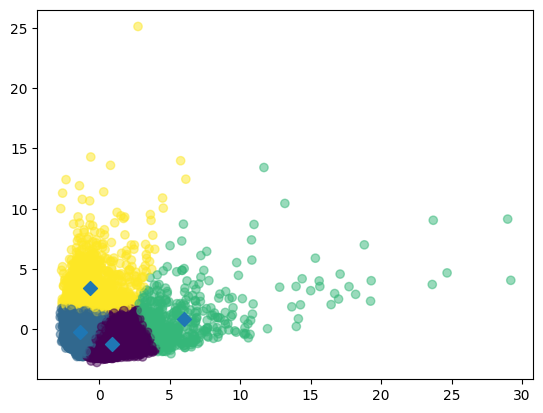

In [144]:
# Plot the clustering

# Assign feature column 0 and 1 as xs and ys
xs = pca_scaled_df[:,0]
ys = pca_scaled_df[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x, centroids_y
plt.scatter(centroids_x, centroids_y,marker='D',s=50)
plt.show()

# Step 8 - Analysis

In [149]:
creditCard_df['labels'] = labels
cc_label = creditCard_df.groupby('labels')[['CREDIT_LIMIT','PURCHASES','BALANCE','CASH_ADVANCE']].mean()
cc_label
# cc_label_melt = pd.melt(cc_label, var_name='column', value_name='value')
# cc_label_melt

,CREDIT_LIMIT,PURCHASES,BALANCE,CASH_ADVANCE
labels,,,,
0,4283.474549,1266.399474,828.995048,146.671409
1,3101.259259,226.651743,1070.532316,631.085780
2,9639.522822,7021.550705,3474.272110,799.845292
3,7510.194321,461.507978,4550.462900,4450.671444


For cluster 0, they are middle class with 4k of credit limit which is second lowest. They are high spender because they have second highest purchases with lowest balances.

For cluster 1, they are first time cc user because they have lowest credit limit. They are cautious spender because they have lowest purchases.

For cluster 2, they are very high income with highest credit limit. They are high spender with highest purchases.

For cluster 3, they are high income with 2nd highest credit limit. They make small cc purchases but big cash advance.



I am a marketing manager in a bank. My job is to increase credit card spending (purchases) and loan (cash advances).

I will focus on cluster 2 and 3 because they have highest income and highest balances.

I want to safeguard bank from bad loan or credit card users not able to pay bank back.

For cluster 2, I will give more promo in order to gain their loyalty. They are good customers that I would not want to let go to my competitors.
For cluster 1, I will give purchase cashbacks to motivate them to make more credit card purchases. 